<a href="https://colab.research.google.com/github/mikemykhaylov/MAT-494/blob/main/2_4_Maximum_Likelihood_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install numpy seaborn scipy matplotlib ipympl pillow scikit-learn requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.3 MB/s eta 0:00:00


In [2]:
from google.colab import output
output.enable_custom_widget_manager()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib widget

# 2.4 Maximum Likelihood Estimation (MLE)

Topics of this chapter
- Maximum Likelihood Estimation (MLE) for random samples
- Linear regression

## Maximum Likelihood Estimation (MLE) for random samples

Maximum likelihood estimation (MLE) is a powerful method for estimating the parameters of a probability distribution. It works by maximizing a likelihood function. The point in the parameter space that maximizes the likelihood function is the maximum likelihood estimate.

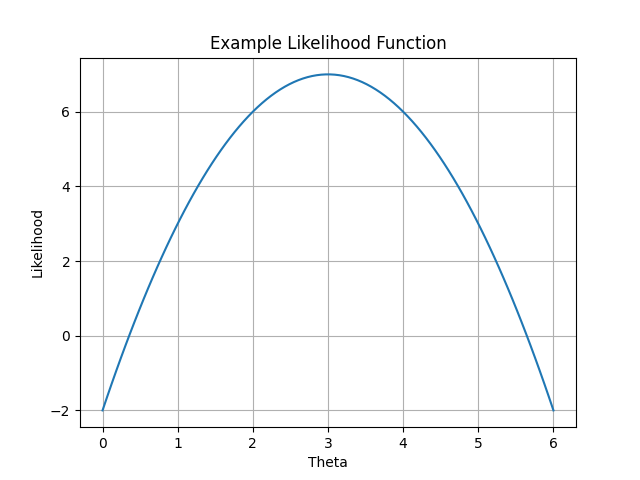

In [5]:
# A simple likelihood function example
def likelihood(theta):
    return -(theta - 3) ** 2 + 7

thetas = np.linspace(0, 6, 100)
plt.figure()
plt.plot(thetas, [likelihood(theta) for theta in thetas])
plt.xlabel('Theta')
plt.ylabel('Likelihood')
plt.title('Example Likelihood Function')
plt.grid(True)
plt.show()

Given a joint pmf or pdf, the likelihood function describes the joint probability of observed data as a function of the parameters. The maximum likelihood estimates are the values of the parameters that maximize this likelihood function.

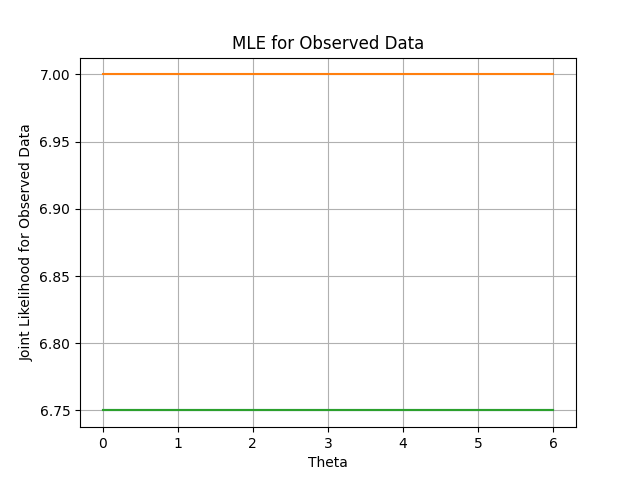

In [6]:
# An illustrative example
observed_data = [2.5, 3, 3.5]
likelihoods = [[likelihood(data) for data in observed_data] for theta in thetas]

plt.figure()
plt.plot(thetas, likelihoods)
plt.xlabel('Theta')
plt.ylabel('Joint Likelihood for Observed Data')
plt.title('MLE for Observed Data')
plt.grid(True)
plt.show()

## Example: Normal Distribution

For a random sample from a normal distribution, the likelihood function can be derived based on the normal distribution formula. To find the maximum likelihood estimates for the parameters μ and σ^2, we take partial derivatives and set them to zero.

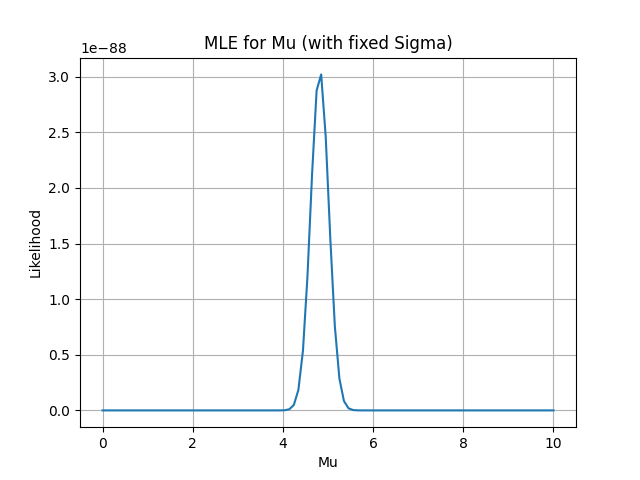

In [7]:
from scipy.stats import norm

# Example data and likelihood calculation
data = np.random.normal(5, 2, 100)
mu_range = np.linspace(0, 10, 100)
sigma_range = np.linspace(1, 4, 100)

# For demonstration purposes, we'll just show the likelihood for various mu with sigma fixed
likelihoods = [np.prod(norm.pdf(data, mu, 2)) for mu in mu_range]
plt.figure()
plt.plot(mu_range, likelihoods)
plt.xlabel('Mu')
plt.ylabel('Likelihood')
plt.title('MLE for Mu (with fixed Sigma)')
plt.grid(True)
plt.show()


## Linear Regression
In the context of linear regression, we can approach the problem from a probabilistic perspective using MLE. The likelihood function for the regression parameters can be derived based on the normal distribution, leading to the familiar least squares problem.

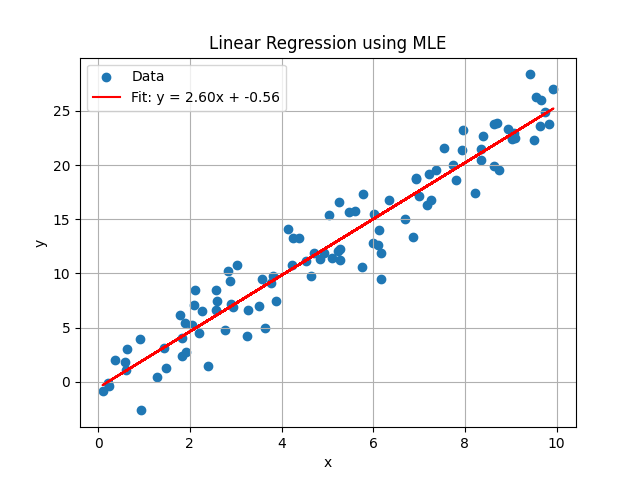

In [8]:
from sklearn.linear_model import LinearRegression

# Sample data for linear regression
x = np.random.rand(100, 1) * 10
y = 2.5 * x.squeeze() + np.random.normal(0, 2, 100)

# Linear regression fit
model = LinearRegression().fit(x, y)
predicted = model.predict(x)

plt.figure()
plt.scatter(x, y, label='Data')
plt.plot(x, predicted, color='red', label=f'Fit: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression using MLE')
plt.grid(True)
plt.show()
